## Observations and Insights

- Figure 1 "Average Datapoints
    The datapoints between Drug Regimens at the average level is similar to each other except Capomulin and Ramicane. Capumulin and Ramicane have a disctinct similarity to each other

With a correlation of 0.84, there is a positive correlation between average tumor volume and weight within the subject mice. 2. Capomulin and Ramicane had the most data points out of all the drugs present in the study. 3. Capomulin and Ramicane were also the most successful drugs in reducing the size of the tumors within the mice subjects.Figiure

## Dependencies and starter code

In [28]:
%matplotlib notebook

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
complete_df = pd.merge(mouse_metadata,study_results,on='Mouse ID',how='left')
complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [84]:
# Generate a summary statistics table of mean, median, variance, 
#standard deviation,and SEM of the TUMOR VOLUME for each regimen


plt.hist(complete_df['Tumor Volume (mm3)'])
plt.title("Tumor Volume per Drug Regimen")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Drug Regimen')
plt.show()

print(f"The mean of tumor volume is: {round(complete_df['Tumor Volume (mm3)'].mean(),2)}")
print(f"The median of tumor volume is: {round(complete_df['Tumor Volume (mm3)'].median(),2)}")
print(f"The standard deviation of tumor volume is: {round(np.std(complete_df['Tumor Volume (mm3)'],ddof = 0),2)}")
print(f"The starndard error of tumor volume is: {round(complete_df['Tumor Volume (mm3)'].sem(),2)}")


The mean of tumor volume is: 50.45
The median of tumor volume is: 48.95
The standard deviation of tumor volume is: 8.89
The starndard error of tumor volume is: 0.2


## Bar plots

<IPython.core.display.Javascript object>


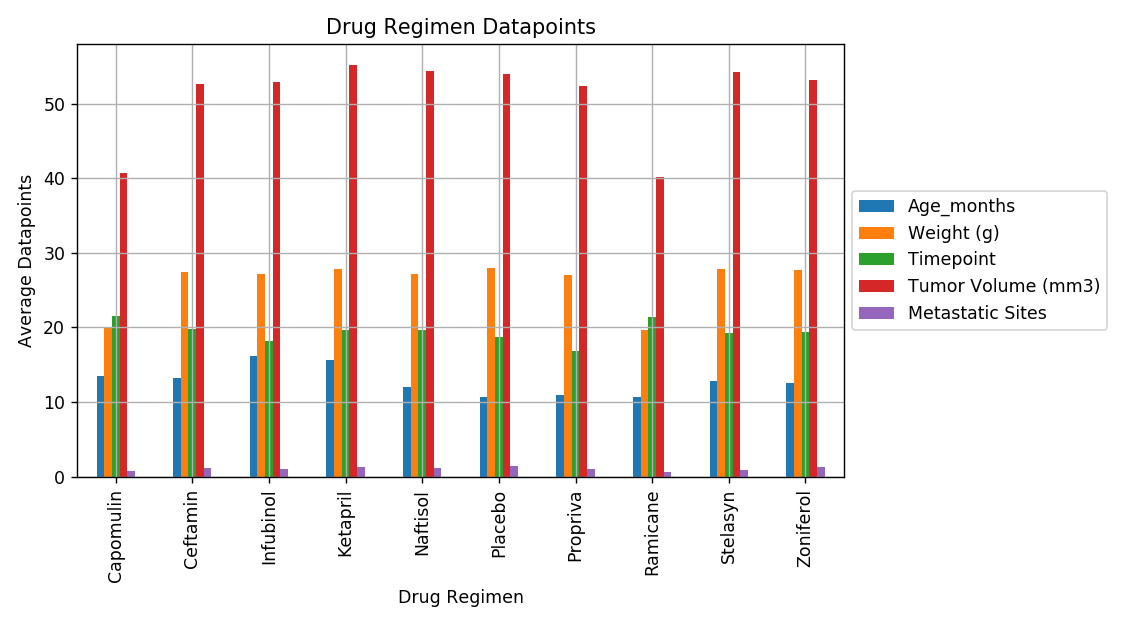

In [148]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
grouped_df = complete_df.groupby(['Drug Regimen'])
avg_regimen_df = grouped_df.mean()


x_axis = np.arange(len(avg_regimen_df))
tick_locations = [value for value in x_axis]

multi_plot = avg_regimen_df.plot(kind="bar", figsize=(9,5),align="center")
multi_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title("Drug Regimen Datapoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Datapoints")

plt.grid()
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


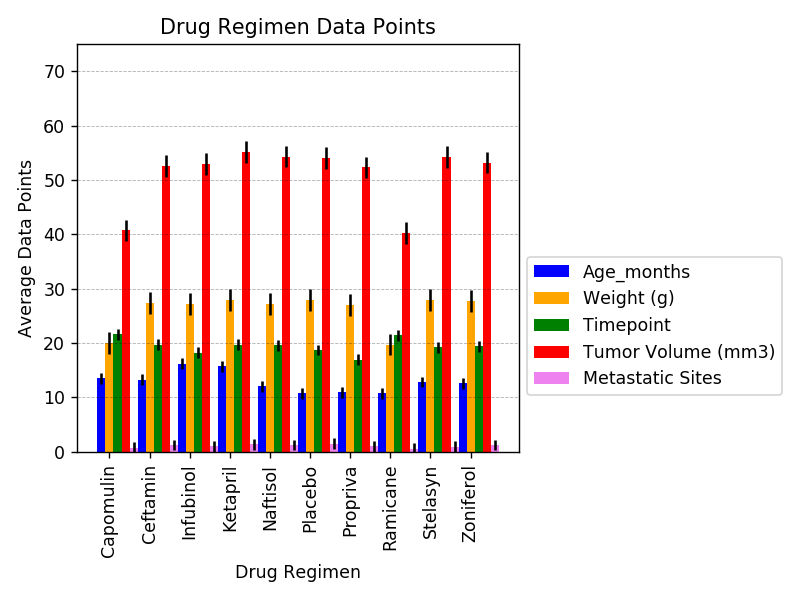

In [126]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

drug_regimen_array = np.array([[13.5,20,21.6,40.7,0.7],[13.2,27.4,19.7,52.6,1.2],[16.2,27.2,18.2,52.9,1],
                              [15.7,27.9,19.7,55.2,1.3],[12,27.2,19.6,54.3,1.2],[10.7,27.9,18.7,54,1.4],
                              [10.9,27,16.9,52.3,1],[10.7,19.7,21.4,40.2,0.5],[12.8,27.9,19.2,54.2,0.9],
                              [12.6,27.7,19.4,53.2,1.2]])

drug_regimen_std = np.array([[1, 2, 1, 2, 1],[1, 2, 1, 2, 1],[1, 2, 1, 2, 1],[1, 2, 1, 2, 1],[1, 2, 1, 2, 1],
                            [1, 2, 1, 2, 1],[1, 2, 1, 2, 1],[1, 2, 1, 2, 1],[1, 2, 1, 2, 1],[1, 2, 1, 2, 1]])    

length = len(drug_regimen_array)
x_labels = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

# Set plot parameters
fig, ax = plt.subplots()
width = 0.2 # width of bar
x = np.arange(length)

ax.bar(x, drug_regimen_array[:,0], width, color='blue', label='Age_months', yerr=drug_regimen_std[:,0])
ax.bar(x + width, drug_regimen_array[:,1], width, color='orange', label='Weight (g)', yerr=drug_regimen_std[:,1])
ax.bar(x + (2 * width), drug_regimen_array[:,2], width, color='green', label='Timepoint', yerr=drug_regimen_std[:,2])
ax.bar(x + (3 * width), drug_regimen_array[:,3], width, color='red', label='Tumor Volume (mm3)', yerr=drug_regimen_std[:,3])
ax.bar(x + (4 * width), drug_regimen_array[:,4], width, color='violet', label='Metastatic Sites', yerr=drug_regimen_std[:,4])

ax.set_ylabel('Average Data Points')
ax.set_ylim(0,75)
ax.set_xticks(x + width)
ax.set_xticklabels(x_labels, rotation='vertical')

ax.set_xlabel('Drug Regimen')
ax.set_title('Drug Regimen Data Points')
ax.legend(bbox_to_anchor=(1, 0.5))
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.show()

## Pie plots

<IPython.core.display.Javascript object>


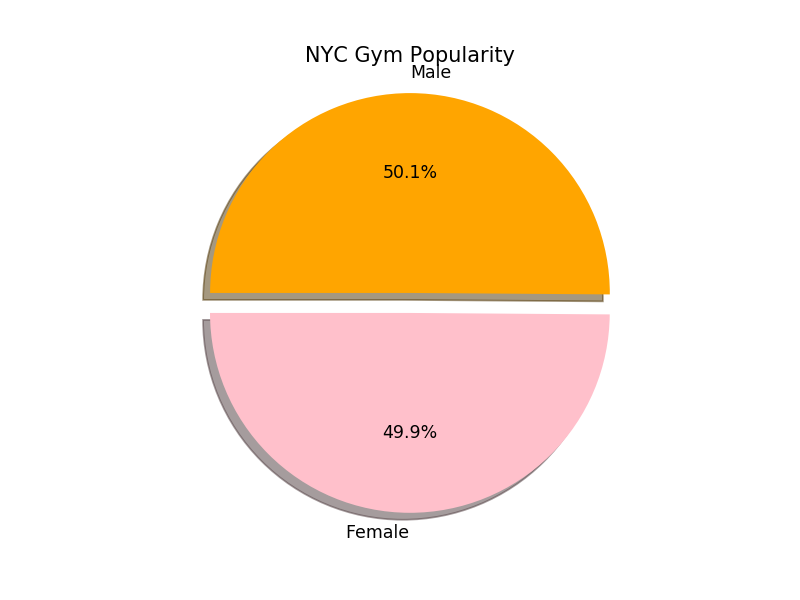

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
%matplotlib notebook
import matplotlib.pyplot as plt
gender_groups = complete_df.groupby(['Drug Regimen','Sex'])
avg_df = gender_groups["Tumor Volume (mm3)"].mean()

genders = ["Female", "Male"]
gender_regimen = "Capomulin"
just_one_drug = avg_df.loc[gender_regimen]

plt.title("NYC Gym Popularity")
plt.pie(just_one_drug, explode=explode, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.show()

<IPython.core.display.Javascript object>


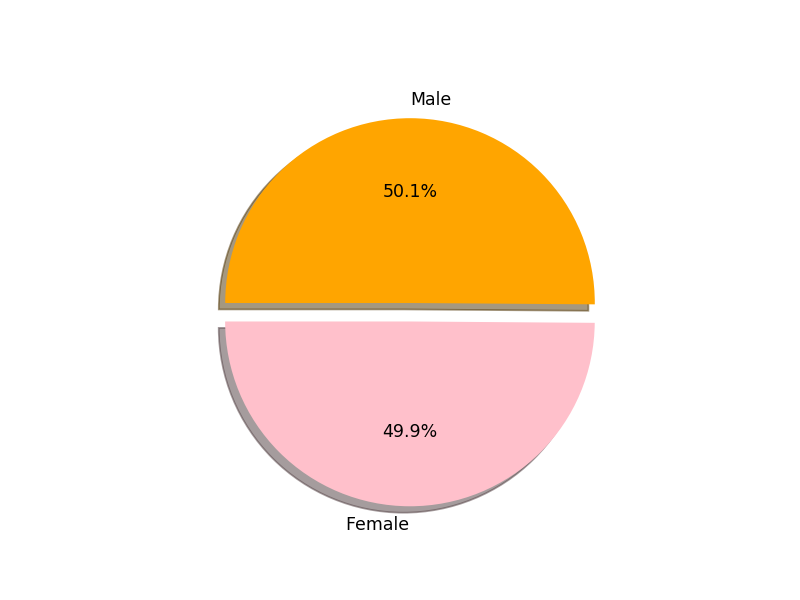

([<matplotlib.patches.Wedge at 0x1d02e75d5c8>,
 [Text(-0.00440127163002829, -1.1999919286428717, 'Female'),
  Text(0.0040342930167126725, 1.0999926020114206, 'Male')],
 [Text(-0.002567408450849835, -0.6999952917083417, '49.9%'),
  Text(0.0022005234636614576, 0.599995964733502, '50.1%')])

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib notebook
import matplotlib.pyplot as plt

gender_regimen= "Capomulin"
labels = ["Female", "Male"]
sizes = [40.59, 40.78]
colors = ["pink", "orange"]
explode = (0.1, 0,)
plt.pie(sizes, labels=labels, colors=colors, explode=explode, 
        autopct="%1.1f%%", shadow=True, startangle=180)

## Quartiles, outliers and boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
complete_df = pd.merge(mouse_metadata,study_results,on='Mouse ID',how='left')

##Four of the most promising treatment regimens
grouped_df = complete_df.groupby(['Drug Regimen'])
criteria_df = grouped_df[["Timepoint", "Tumor Volume (mm3)"]].mean()
criteria_df

,Timepoint,Tumor Volume (mm3)
Drug Regimen,,
Capomulin,21.565217,40.675741
Ceftamin,19.747191,52.591172
Infubinol,18.174157,52.884795
Ketapril,19.707447,55.235638
Naftisol,19.623656,54.331565
Placebo,18.674033,54.033581
Propriva,16.863354,52.322552
Ramicane,21.425439,40.216745
Stelasyn,19.226519,54.233149


<IPython.core.display.Javascript object>


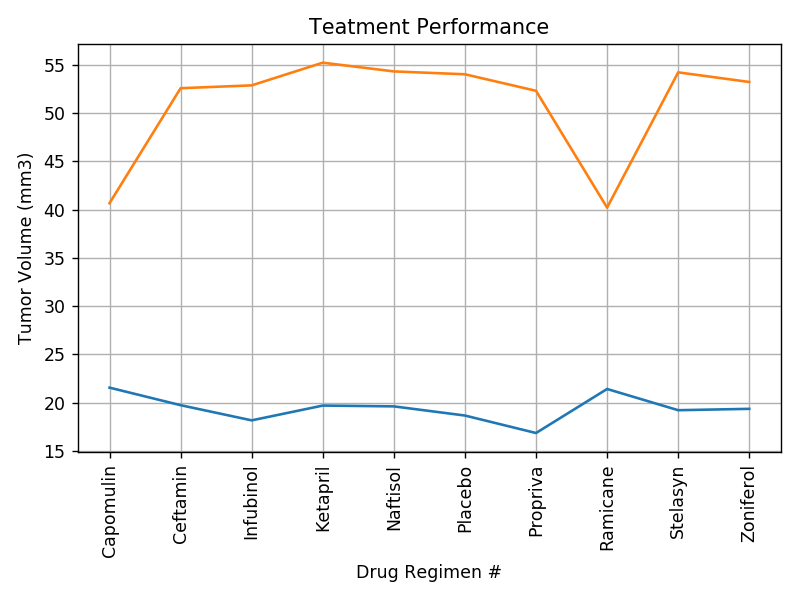

In [57]:
plt.plot(criteria_df)
plt.xticks(rotation='vertical')
plt.title("Teatment Performance")
plt.xlabel("Drug Regimen #")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()
plt.tight_layout()

#(Capomulin, Infubinol, Propriva, Ramicane)

In [58]:
##Calculate the final tumor volume of each mouse across four (Capomulin, Infubinol, Propriva, Ramicane)
cap_df = complete_df.loc[complete_df["Drug Regimen"] == "Capomulin",:]
cap_df1 = cap_df.groupby('Mouse ID').max()['Timepoint']
cap_tumor = pd.DataFrame(cap_df1)
cap_merge = pd.merge(cap_tumor, complete_df, on=("Mouse ID","Timepoint"),how="left")
cap_merge.head()

cap_final_tumor = cap_merge["Tumor Volume (mm3)"]

cap_quartiles = cap_final_tumor.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*iqr)
cap_upper_bound = cap_upperq + (1.5*iqr)

print(f"Capomulin tumor volume values below {cap_lower_bound} and above {cap_upper_bound}  could be outliers.")

Capomulin tumor volume values below 20.70456164999999 and above 51.83201549  could be outliers.


In [59]:
inf_df = complete_df.loc[complete_df["Drug Regimen"] == "Infubinol",:]
inf_df1 = inf_df.groupby('Mouse ID').max()['Timepoint']
inf_tumor = pd.DataFrame(inf_df1)
inf_merge = pd.merge(inf_tumor, complete_df, on=("Mouse ID","Timepoint"),how="left")
inf_merge.head()
inf_final_tumor = inf_merge["Tumor Volume (mm3)"]

inf_quartiles = inf_final_tumor.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*iqr)
inf_upper_bound = inf_upperq + (1.5*iqr)

print(f"Infubinol tumor volume values below {inf_lower_bound} and above {inf_upper_bound}  could be outliers.")

Infubinol tumor volume values below 42.375812499999995 and above 77.19853804  could be outliers.


In [60]:
prop_df = complete_df.loc[complete_df["Drug Regimen"] == "Propriva",:]
prop_df1 = prop_df.groupby('Mouse ID').max()['Timepoint']
prop_tumor = pd.DataFrame(prop_df1)
prop_merge = pd.merge(prop_tumor, complete_df, on=("Mouse ID","Timepoint"),how="left")
prop_merge.head()

prop_final_tumor = prop_merge["Tumor Volume (mm3)"]

prop_quartiles = prop_final_tumor.quantile([.25,.5,.75])
prop_lowerq = prop_quartiles[0.25]
prop_upperq = prop_quartiles[0.75]
prop_iqr = prop_upperq-prop_lowerq
prop_lower_bound = prop_lowerq - (1.5*iqr)
prop_upper_bound = prop_upperq + (1.5*iqr)

print(f"Propriva tumor volume values below {prop_lower_bound} and above {prop_upper_bound}  could be outliers.")

Propriva tumor volume values below 37.450173789999994 and above 74.24367480000001  could be outliers.


In [62]:
ram_df = complete_df.loc[complete_df["Drug Regimen"] == "Ramicane",:]
ram_df1 = ram_df.groupby('Mouse ID').max()['Timepoint']
ram_tumor = pd.DataFrame(ram_df1)
ram_merge = pd.merge(ram_tumor, complete_df, on=("Mouse ID","Timepoint"),how="left")
ram_merge.head()

ram_final_tumor = ram_merge["Tumor Volume (mm3)"]

ram_quartiles = ram_final_tumor.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*iqr)
ram_upper_bound = ram_upperq + (1.5*iqr)

print(f"Ramicane tumor volume values below {ram_lower_bound} and above {ram_upper_bound}  could be outliers.")

Ramicane tumor volume values below 19.887674359999995 and above 52.33180146000001  could be outliers.


<IPython.core.display.Javascript object>


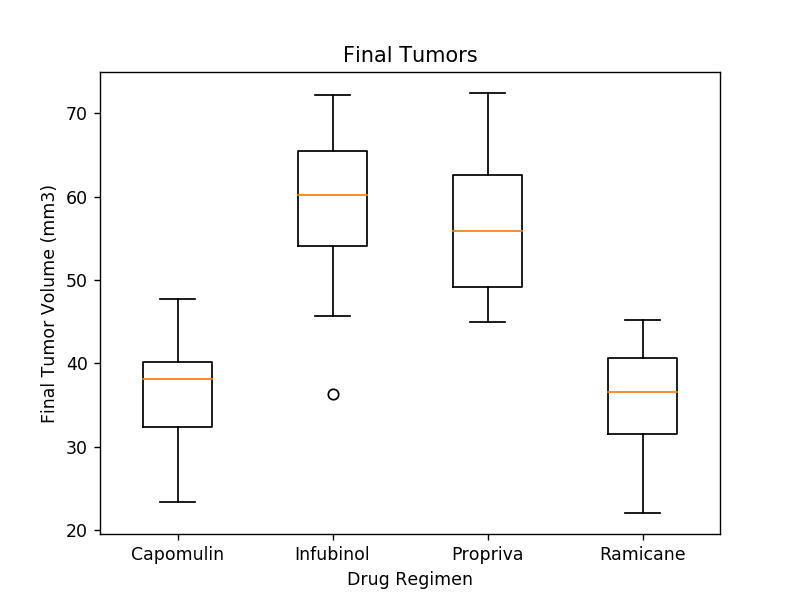

In [67]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot_df = [cap_final_tumor, inf_final_tumor, prop_final_tumor, ram_final_tumor]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(box_plot_df, labels=["Capomulin","Infubinol","Propriva", "Ramicane",])

plt.savefig('boxplot')
plt.show()

## Line and scatter plots

<IPython.core.display.Javascript object>


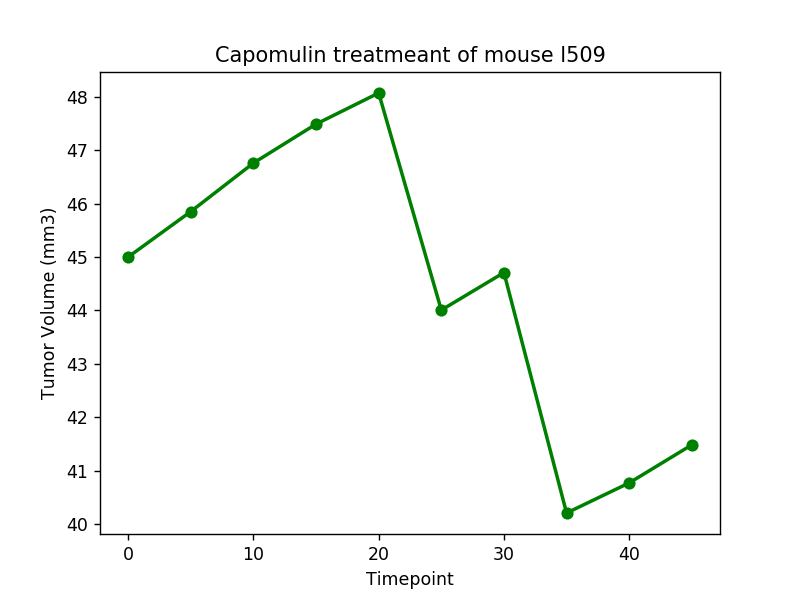

In [96]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

##Four of the most promising treatment regimens
grouped_df = complete_df.groupby(['Drug Regimen'])
criteria_df = grouped_df[["Timepoint", "Tumor Volume (mm3)"]].mean()
cap_df = complete_df.loc[complete_df["Drug Regimen"] == "Capomulin",:]

capline_df = cap_df.loc[cap_df["Mouse ID"] == "l509",:]
capline_df.head()

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

cap_time = capline_df["Timepoint"]
cap_tumor= capline_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(cap_time, cap_tumor,linewidth=2, marker="o", color="green")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

<IPython.core.display.Javascript object>


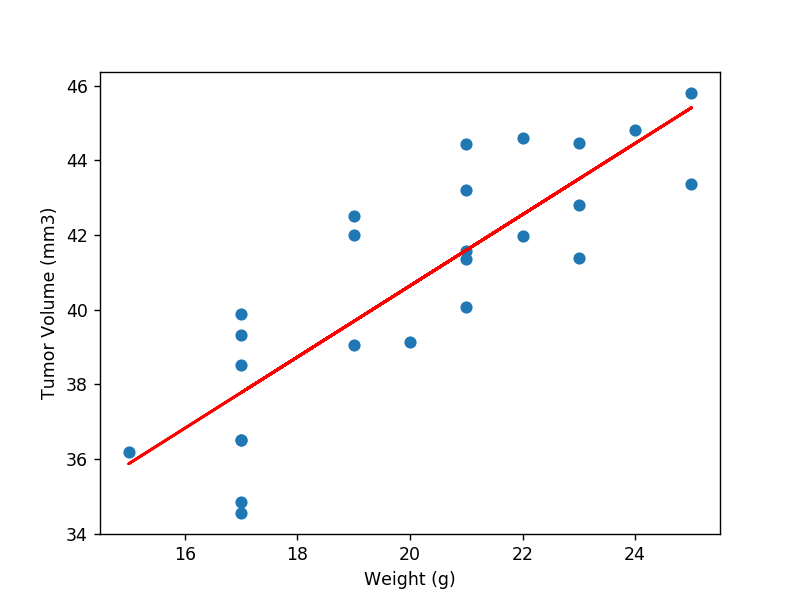

In [114]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

cap_avg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

In [104]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for 
# the Capomulin regimen
import scipy.stats as st

correlation=round(st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


In [116]:
import scipy.stats as st
from scipy.stats import linregress

x_values = cap_avg['Weight (g)']
y_values = cap_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()